**California Housing**

This is a dataset obtained from the StatLib repository. Here is the included description:

S&P Letters Data
We collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. W e excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).




Building a Regression MLP [Multi Layer Perceptron] using the Sequential API in Keras

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train , X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [0]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = tf.keras.Sequential([
                             keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                             keras.layers.Dense(1)
                             ])

model.compile(optimizer="sgd",
              loss="mean_squared_error")

history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] #pretend these are new instances

y_predict = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/25
11610/11610 [==============================] - 1s 100us/sample - loss: 0.8657 - val_loss: 0.9207
Epoch 2/25
11610/11610 [==============================] - 1s 84us/sample - loss: 0.5345 - val_loss: 0.4917
Epoch 3/25
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4717 - val_loss: 0.4643
Epoch 4/25
11610/11610 [==============================] - 1s 83us/sample - loss: 0.4487 - val_loss: 0.4549
Epoch 5/25
11610/11610 [==============================] - 1s 83us/sample - loss: 0.4382 - val_loss: 0.4458
Epoch 6/25
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4310 - val_loss: 0.4371
Epoch 7/25
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4240 - val_loss: 0.4322
Epoch 8/25
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4260 - val_loss: 0.4308
Epoch 9/25
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4155 - val_

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

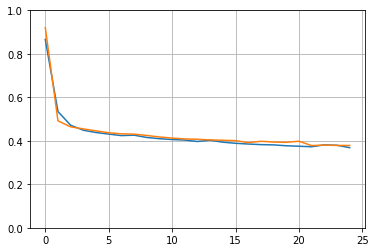

In [26]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()